<a href="https://colab.research.google.com/github/Shayankr/AI_and_ComputerVision/blob/master/Toy_NN_Model_MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Framework
'''
1. TensorFlow - Google 
2. PyTorch    - FB
3. MXNet, CNTK, Caffe2 (Theano)
'''

'\n1. TensorFlow - Google \n2. PyTorch    - FB\n3. MXNet, CNTK, Caffe2 (Theano)\n'

In [2]:
# Wrapper / HLL
"""
Keras
"""

'\nKeras\n'

In [3]:
!pip show tensorflow

Name: tensorflow
Version: 2.8.2+zzzcolab20220719082949
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras-preprocessing, tensorboard, setuptools, absl-py, typing-extensions, keras, opt-einsum, astunparse, h5py, google-pasta, six, flatbuffers, tensorflow-io-gcs-filesystem, tensorflow-estimator, libclang, gast, protobuf, grpcio, wrapt, numpy, termcolor
Required-by: kapre


In [4]:
# ! pip install tensorflow 

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
# 60K single channel images with 28 height & 28 width

8


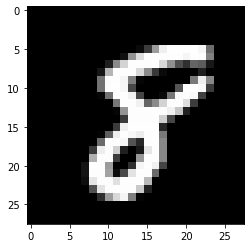

In [9]:
plt.imshow(x_train[777], cmap="gray")
print(y_train[777])

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
x_train[777].shape

(28, 28)

In [12]:
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

In [13]:
x_train[777]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  59, 156, 239, 254, 254, 254, 255, 246, 109,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 147, 220, 253, 254, 253, 253, 253

In [14]:
x_train[123]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

7


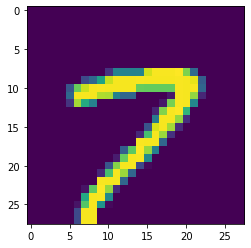

In [15]:
plt.imshow(x_train[123])
print(y_train[123])

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

In [17]:
y_train = to_categorical(y_train) #OHE

In [18]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation=relu))
model.add(Dense(10, activation=softmax))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
(784 * 128) + 128

100480

In [21]:
(128*10) + 10 

1290

In [22]:
model.compile(optimizer=SGD(), loss=categorical_crossentropy, metrics=["acc"])

In [23]:
model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 5s 3ms/step - loss: 17.4502 - acc: 0.3747
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 1.4498 - acc: 0.4909
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 1.4379 - acc: 0.4786
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 1.3305 - acc: 0.5421
Epoch 5/5
938/938 [==============================] - 2s 3ms/step - loss: 1.2132 - acc: 0.6112


In [24]:
60_000 / 64

937.5

In [25]:
y2_label = [2,0,1,2,1,1,0] # cat, dog, elephant 

In [26]:
to_categorical(y2_label)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=float32)